# Set de Datos
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [1]:
import pandas as pd
datos = pd.read_csv('housing.csv')

In [2]:
datos.head()
# aqui podemos observar que ocean_proximity es categorico y no numerico por loque deberemos convertirlo mas adelante

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
datos['ocean_proximity'].value_counts()# estos datos deben ser convertidos a numericos

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
datos.info()
# si somos atentos todos menos total_bedrooms tienen 20640 filas eso quieres decir que tiene datos vacios o nulos
# esto tambien se debe solucionar porque todos los valores deben tener datos
# esto se puede hacer mas adelante se llena con la media o se eliminan filas en este caso la eliminaremos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
datos.describe()
# podemos observar algunos datos importantes como la antiguedad de las casas
# en mean que es el promedio podemos ver que hay 28.63 años de antiguedad
# y el maximo es 52.54 años
# y el minimoes de 1 año
# tambien vemos los percentiles que nos indican que el 25% de las casas tienen menos de 18.52 años

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Graficar Datos

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

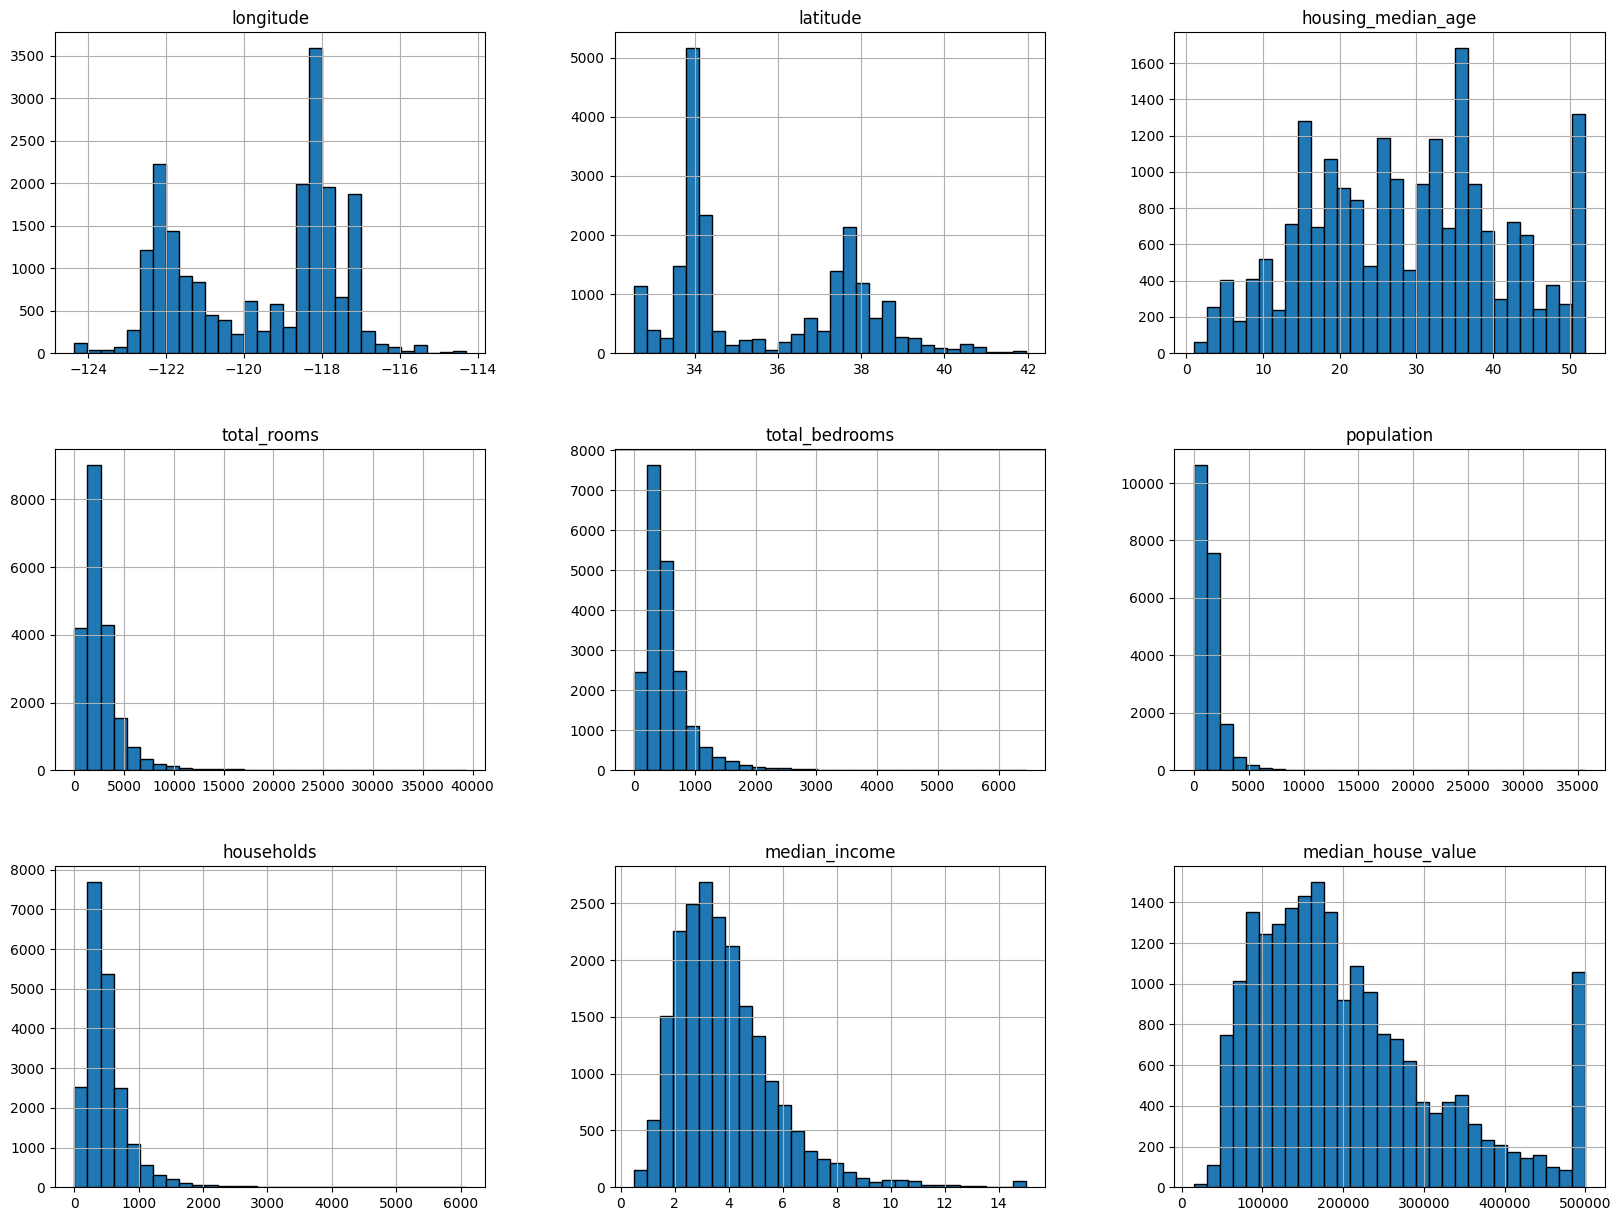

In [6]:
# la mejor formade observar los datos es gaficandolos
datos.hist(figsize=(20,15), bins=30, edgecolor='black')
# en este momento puede que se vea desordenato pero podemos cambiar le tamaño con figsize
# puede que tenga pocas barras con bins podemos agregar mas barras
# con edgecolor coloreamos los contornos o bordes de las barras
# ahora si vemos la grafica podemos encontrar datos atipicos como el de la edad de las casas y el ivalor de las casas
# por eso es importante hacer el proceso de limpieza de datos 

<Axes: xlabel='longitude', ylabel='latitude'>

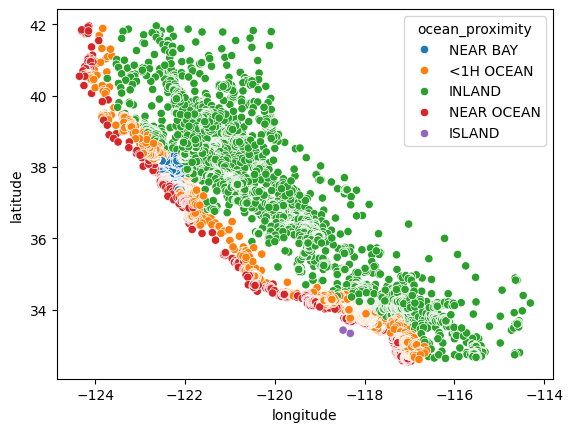

In [7]:
# podemos utilizar la longitud y la latidud para graficar los datos
import seaborn as sb
sb.scatterplot(x='longitude', y='latitude', data=datos, hue='ocean_proximity')
# en este caso la grafica muestra la ubicacion de las casas la funcion hue permite colorear los puntos por ocean_proximity

<Axes: xlabel='longitude', ylabel='latitude'>

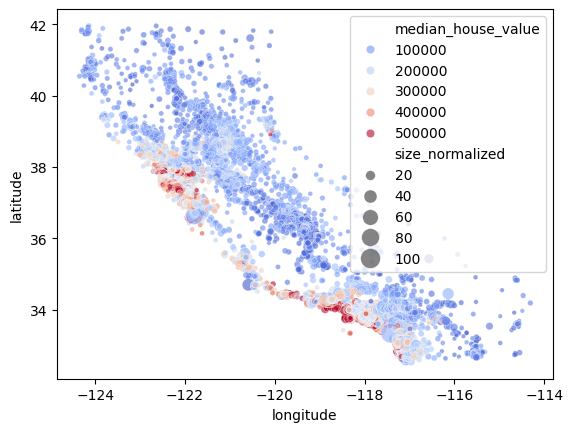

In [8]:
# ahora lo graficaremos por median_house_value
datos['size_normalized'] = datos['population'] / datos['population'].max() * 100
sb.scatterplot(
    x='longitude',
    y='latitude',
    data=datos,
    hue='median_house_value',
    size='size_normalized',  # ¡Usar size en vez de s!
    palette='coolwarm',
    sizes=(10, 200),         # Rango de tamaños (min, max)
    alpha=0.6
)

<Axes: xlabel='longitude', ylabel='latitude'>

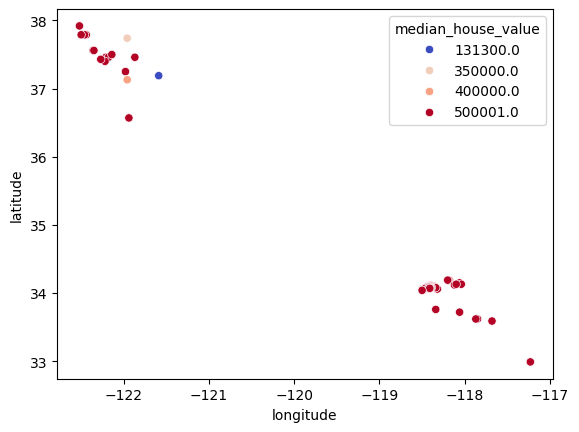

In [9]:
# donde viven las personas con las casas mas caras
sb.scatterplot(x='longitude', y='latitude', data=datos[(datos.median_income>14)], hue='median_house_value', palette='coolwarm')

## Quitar datos

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  size_normalized     20640 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [11]:
# datos.dropna()# esto crea un nuevo dataframe sin modificar los datos originales
# si queremos transformar de verdad los datos originales d
datos_na = datos.dropna()
datos_na.info()
# con esto eliminamos filas con datos nulos y se crea un nuevo dataframe llamado datos_na

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
 10  size_normalized     20433 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


## convertir caracteristicas categorias a numericas

In [12]:
datos_na['ocean_proximity'].value_counts()
# aqui podemos convertir los datos categoricos a numericos 1h ocrean puede ser 1
# inland 2
# near ocean 3
# near bay 4
# island 5
#! pero hay que tener cuidado porque el modelo al ver esto puede dar mayor peso al numero 5

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

### Dumies/One-hot Encoding
podemos hacer lo siguiente para evitar que le de un peso al numero 5 en ves de simplemente numeraciones hacemos
NEAR BAY     INLAND      NEAR OCEAN
    1           0             0
    0           0             1
y asi corregimos ese problema 

In [13]:
# para eso hacemos uso de dummies y lo vamos a guardar en una variable tambien llamada dummies
dummies = pd.get_dummies(datos_na['ocean_proximity'],dtype=int)
# dtype lo usamos para especificar el tipo de dato sino solo pondra true o false

In [14]:
# para agregar dummies como columna al dataframe original podemos hacer lo siguiente
# recuerda para sobrescribir o para hacer otra copia de los datos cambiados siempre usamos una variable = lo que queremos
datos_na = datos_na.join(dummies)
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,size_normalized,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.902416,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.728883,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.390057,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.563814,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.583431,0,0,0,1,0


In [15]:
# ahora que no necesitamos ocean_proximity lo podemos quitar del dataframe o dataset
datos_na = datos_na.drop(['ocean_proximity'], axis=1)
# axis = 1 hace referencia a columnas ya que es una que vamos a quitar

In [16]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,size_normalized,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.902416,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.728883,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.390057,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.563814,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.583431,0,0,0,1,0


## correlaciones

In [17]:
# Analisis, nuevas caraceristicas
datos_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,size_normalized,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.100270,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.108997,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.295787,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.857281,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.877747,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,1.000000,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.907186,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.005087,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.025300,0.257614,-0.484787,0.023525,0.160526,0.140378
size_normalized,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,1.000000,0.073450,-0.019602,-0.010451,-0.061480,-0.023498


<Axes: >

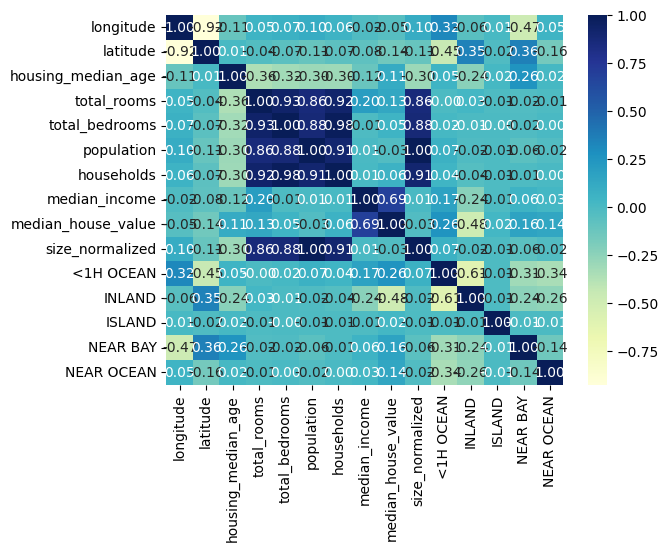

In [18]:
sb.set_style(rc={'figure.figsize':(15,10)})
sb.heatmap(datos_na.corr(), annot=True, cmap='YlGnBu', fmt='.2f')

In [19]:
# Para concentrarnos en lo que nos interesa el precio de la casa 
datos_na.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
size_normalized      -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

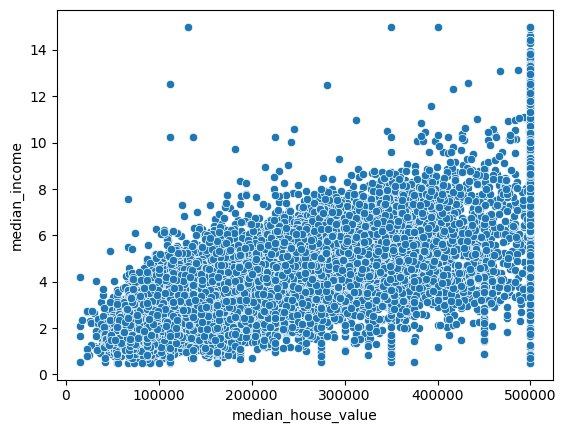

In [20]:
sb.scatterplot(x=datos_na['median_house_value'], y=datos_na['median_income'])

In [21]:
datos_na['bedroom_ratio'] = datos_na['total_bedrooms']/datos_na['total_rooms']

In [29]:
import matplotlib.pyplot as plt

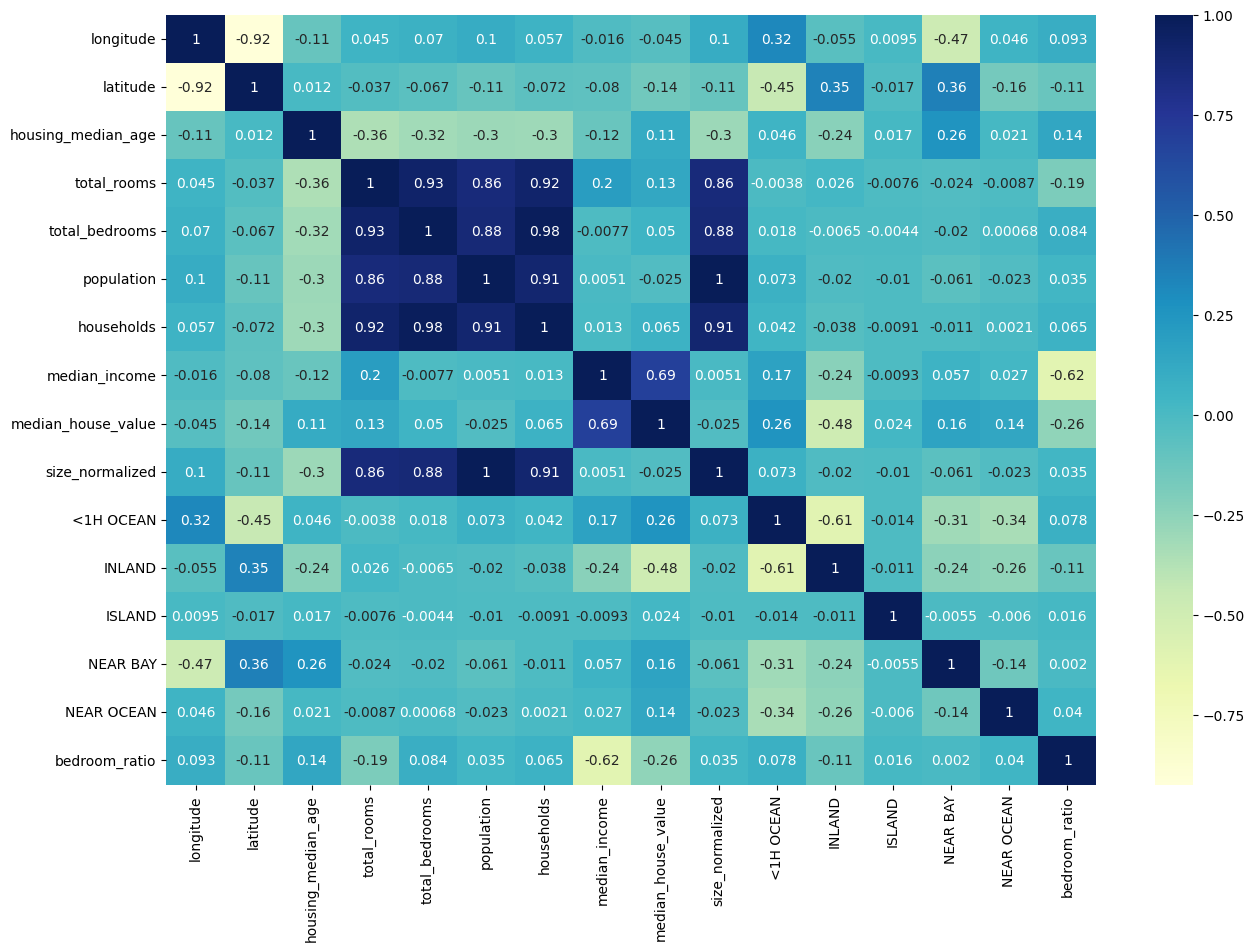

In [ ]:
plt.figure(figsize=(15, 10))  # Ajusta el ancho y alto según tus necesidades

# Crear el heatmap
sb.heatmap(datos_na.corr(), annot=True, cmap='YlGnBu')

# Guarda el grafico generado pero por ahora no lo haremos
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

## Separamos las caracteritsicas de la etiqueta

In [34]:
x = datos_na.drop(['median_house_value'], axis=1)
y = datos_na['median_house_value']

### Separamos los datos en 2 partes: Conjunto de entrenamiento y uno de puebas

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [36]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [37]:
# entrenamos
modelo.fit(x_train, y_train)

LinearRegression()

In [38]:
predicciones = modelo.predict(x_test)

In [39]:
comparativa = {'Predicion': predicciones, 'Valor real': y_test}
pd.DataFrame(comparativa).head(10)

,Predicion,Valor real
16619,220668.303028,278100.0
519,327705.481773,340700.0
3899,257739.633836,193700.0
6624,230161.913880,173100.0
10073,104423.807265,117300.0
15370,178980.553546,227000.0
9671,89509.940586,160700.0
18726,17208.678036,98800.0
16711,238122.470075,277300.0
17650,243670.633308,218600.0


In [ ]:
# el Overfitting es un problema que ocurre cuando el modelo se ajusta demasiado
# a los datos de entrenamiento y no generaliza bien a los datos nuevos.

print(modelo.score(x_train, y_train)) # es igual a 0.6538...
print(modelo.score(x_test, y_test))# es igual a 0.6444...
# en este caso no tenemos un sobreajuste porque ambos son similares

0.6538968865366654
0.6444365167099031


## Para ver las etiquetas erradas

In [41]:
# Error
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, predicciones)

In [42]:
mse

4851559633.732576

In [43]:
# como es un numero muy grande optendremos la raiz cuadrada
rmse = np.sqrt(mse)
rmse

np.float64(69653.13800348536)

In [ ]:
# EScaler
# hay algo muy importante es que ebemos de tener cuidado con los datos
# porque cuando los datos del modleo tiene un dato muy grande este puede afectar el resultado
# lo que hace el escaler es poner a todos en un rango pequeño
datos_na.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,size_normalized,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,3.993462,0.442128,0.317917,0.000245,0.111095,0.128615,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,3.175855,0.496652,0.465678,0.015641,0.314257,0.334782,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.008408,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,2.205594,0.000000,0.000000,0.000000,0.000000,0.000000,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,3.267754,0.000000,0.000000,0.000000,0.000000,0.000000,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,4.825963,1.000000,1.000000,0.000000,0.000000,0.000000,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_escaled = scaler.fit_transform(x_train)
x_test_escaled = scaler.transform(x_test)

In [46]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,size_normalized,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
13795,-117.42,34.59,8.0,5445.0,1360.0,3220.0,1214.0,1.7567,9.024158,0,1,0,0,0,0.249770
5079,-118.30,33.98,52.0,1371.0,315.0,986.0,277.0,2.9432,2.763298,1,0,0,0,0,0.229759
18292,-122.11,37.40,31.0,2836.0,490.0,1138.0,481.0,4.9519,3.189283,0,0,0,1,0,0.172779
11234,-117.96,33.80,30.0,729.0,131.0,488.0,139.0,4.7667,1.367636,1,0,0,0,0,0.179698
16814,-122.43,37.64,34.0,8400.0,1812.0,4101.0,1717.0,4.1033,11.493190,0,0,0,0,1,0.215714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17434,-120.46,34.63,48.0,1408.0,301.0,682.0,279.0,2.9271,1.911328,0,0,0,0,1,0.213778
16706,-120.30,35.10,16.0,2819.0,479.0,1068.0,365.0,4.5461,2.993106,1,0,0,0,0,0.169918
17306,-119.55,34.38,17.0,1951.0,368.0,681.0,350.0,2.7275,1.908525,1,0,0,0,0,0.188621
18595,-122.12,37.09,36.0,1397.0,289.0,661.0,243.0,4.1250,1.852475,0,0,0,0,1,0.206872


In [48]:
pd.DataFrame(x_train_escaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.075796,-0.489402,-1.639487,1.280766,1.955012,1.568934,1.878368,-1.118975,1.568934,-0.891452,1.469441,-0.017492,-0.354186,-0.384674,0.638035
1,0.636347,-0.775021,1.857383,-0.576996,-0.529829,-0.384533,-0.584306,-0.487954,-0.384533,1.121766,-0.680531,-0.017492,-0.354186,-0.384674,0.288781
2,-1.266266,0.826320,0.188422,0.091051,-0.113707,-0.251620,-0.048142,0.580341,-0.251620,-0.891452,-0.680531,-0.017492,2.823377,-0.384674,-0.705702
3,0.806134,-0.859302,0.108948,-0.869751,-0.967351,-0.819996,-0.947005,0.481845,-0.819996,1.121766,-0.680531,-0.017492,-0.354186,-0.384674,-0.584934
4,-1.426065,0.938695,0.426845,2.628260,3.029794,2.339302,3.200380,0.129027,2.339302,-0.891452,-0.680531,-0.017492,-0.354186,2.599606,0.043654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-0.442300,-0.470673,1.539486,-0.560124,-0.563118,-0.650358,-0.579049,-0.496516,-0.650358,-0.891452,-0.680531,-0.017492,-0.354186,2.599606,0.009867
16342,-0.362400,-0.250605,-1.003693,0.083298,-0.139863,-0.312830,-0.353019,0.364523,-0.312830,1.121766,-0.680531,-0.017492,-0.354186,-0.384674,-0.755620
16343,0.012130,-0.587730,-0.924218,-0.312514,-0.403803,-0.651232,-0.392443,-0.602670,-0.651232,1.121766,-0.680531,-0.017492,-0.354186,-0.384674,-0.429201
16344,-1.271259,0.681169,0.585794,-0.565140,-0.591652,-0.668721,-0.673666,0.140567,-0.668721,-0.891452,-0.680531,-0.017492,-0.354186,2.599606,-0.110673
